Для начала нужно подключить библиотеки для работы с изображением

In [1]:
from PIL import Image
import random
import os

Далее создаем переменные rand_folder и folder. Так как у нас 7 папок, то и диапозон будет соответсвующий. Мы создаем список images по указаному пути, где находяться изображения

In [2]:
rand_folder = random.randint(1, 7)
folder = f'../data/DATASET/train/{rand_folder}'
images = [f for f in os.listdir(folder)
          if f.lower().endswith(('.jpg'))]

Далее нам нужно выбрать изображение случайным образом и написать полный путь к изображению

In [3]:
random_image = random.choice(images)
image_path = os.path.join(folder, random_image)

После создаем переменную photo и photo_data. В photo открываем само изображение, а в photo_data предмтавляем цвета в численное представление. В данном случае это будет список каждого пикселя в формате RGB.

In [4]:
photo = Image.open(image_path)
photo_data = list(photo.getdata())
print(image_path)
print(photo.size)
print(photo.mode)
print(photo_data)

../data/DATASET/train/3/train_09669_aligned.jpg
(100, 100)
RGB
[(108, 55, 49), (112, 62, 55), (112, 65, 57), (106, 66, 56), (101, 64, 55), (87, 57, 46), (62, 38, 26), (39, 20, 6), (37, 19, 9), (37, 20, 10), (45, 28, 20), (66, 49, 41), (103, 82, 77), (143, 122, 117), (180, 155, 151), (202, 174, 171), (212, 182, 182), (215, 183, 184), (217, 185, 186), (219, 189, 189), (220, 190, 190), (219, 191, 190), (215, 189, 188), (213, 189, 187), (214, 190, 188), (213, 192, 189), (213, 194, 190), (214, 196, 192), (217, 199, 195), (217, 202, 197), (218, 203, 198), (221, 204, 197), (219, 200, 194), (220, 200, 193), (220, 200, 193), (221, 201, 194), (221, 201, 194), (222, 202, 195), (223, 203, 196), (223, 203, 196), (226, 206, 199), (227, 207, 200), (227, 207, 200), (228, 208, 201), (228, 208, 201), (228, 208, 201), (227, 207, 200), (227, 207, 200), (230, 206, 202), (230, 206, 202), (230, 206, 202), (231, 207, 203), (230, 210, 203), (230, 210, 203), (231, 211, 204), (231, 211, 204), (230, 212, 202), (2

Ответы на вопросы по первому этапу:
1. Режим изображений RGB, размер изображений 100х100. Все изображения в датасете имеют одинаковый размер
2. Изображение численно представленно в виде списка, состоящего из 10000 элементов(т.к. размер изображения 100х100). Каналы - это отдельные компоненты цвета, из котрых сосотоит полное изображения. В исходном изображение 3 канала типа RGB.
3. Пиксели имееют тип данных кортеж. В кортежележит три числа, они принимают значения от 0 до 255, например: (167, 144, 113)

Этап 2:
Нужно подключить библиотку torchvision.transforms

In [5]:
import torch
import torchvision.transforms as t

Далее мы создаем переменную pipline, где используем Grayscale, Resize,ToTensor и Normalize

In [6]:
pipline = t.Compose([
    t.Grayscale(num_output_channels=1),
    t.Resize((100, 100)),
    t.ToTensor(),
    t.Normalize(mean=[0.5], std=[0.5])
])

После создаем переменную transofrm_image, где в наш конфеер кладём не трансформированное фото

In [7]:
transform_image = pipline(photo)
print(transform_image)

tensor([[[-0.4510, -0.4039, -0.3882,  ..., -0.4667, -0.4824, -0.4824],
         [-0.4275, -0.3804, -0.3490,  ..., -0.4196, -0.4431, -0.4588],
         [-0.3725, -0.3412, -0.3020,  ..., -0.3569, -0.4039, -0.4275],
         ...,
         [-0.4118, -0.4039, -0.3961,  ...,  0.0118,  0.0431,  0.0510],
         [-0.3961, -0.3804, -0.3725,  ...,  0.0745,  0.0980,  0.1137],
         [-0.4039, -0.3961, -0.3882,  ...,  0.0902,  0.1137,  0.1216]]])


Ответы на вопросы:
1. Будет полезно избавиться от цветов, т.к. нам нужна геометрия лица, модель будет сфокусирована именно на объекте. Численное пердстваление изменилось, теперь у нас только 1 канал.
2. Нужно в батче иметь одинаковый размер, т.к. модель даст лучшие результаты, если все фотографии будут 1 размера
3. Трансформация преобразует все в тензор типа float32. c диапазоном данных [0, 1]. а также получили массив
4. Нормализация нужна для ускорения обучения, помощи к градиентному спуску, а также для повышения тончости. ДЛя черно-белого изображения стоит писать в mean и std [0.5]

Этап 3: Для начала подключим pandas, matplotlib.pyplot, toPILImage

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

При помощи pandas откроем csv таблицу train_labels

In [9]:
data = pd.read_csv('../data/train_labels.csv')

По скольку у нас 7 эмоций, то считать количевство изображений будем через значение labe = номер_папки, где номер_папки обазначает папку, где храняться изображения некоторых эмоций. Посчитаем количевство всех 7 папок

In [10]:
result_wonder = (data['label'] == 1).sum()
result_scared = (data['label'] == 2).sum()
result_disgust = (data['label'] == 3).sum()
result_happy = (data['label'] == 4).sum()
result_sad = (data['label'] == 5).sum()
result_angry = (data['label'] == 6).sum()
result_neutral = (data['label'] == 7).sum()

Для визуализаций количевста изображенйи для каждой эмоции нужно построить график при помощи matplotlib. Где за x возбмем список эмоций, а за y возьмем посчитаное количевство. После построим столбчатую диаграмму

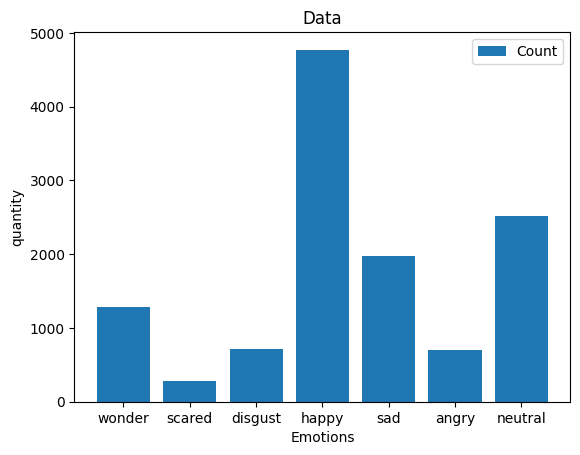

In [11]:
x = ['wonder', 'scared', 'disgust', 'happy', 'sad', 'angry', 'neutral']
y = [result_wonder, result_scared, result_disgust, result_happy, result_sad, result_angry, result_neutral]

plt.bar(x, y, label = 'Count')
plt.xlabel('Emotions')
plt.ylabel('quantity')
plt.title('Data')
plt.legend()
plt.show()

Далее напишем функцию визуализации, где мы сравним оригинальное изображение, чёрно-белое изображение, а также финальный тензор после всех преобразований. У функции будут 2 аргумента, это путь оригинального изображения и тензор. Функция будет сразу делать график

In [12]:
def visualize(image_path, tensor_image):
    image = Image.open(image_path)
    gray_image = image.convert('L')
    to_pil = ToPILImage()
    final_image = to_pil(tensor_image)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image)
    axes[0].set_title("Оригинал")
    axes[0].axis("off")

    axes[1].imshow(gray_image, cmap="gray")
    axes[1].set_title("Grayscale")
    axes[1].axis("off")

    axes[2].imshow(final_image)
    axes[2].set_title("После преобразований")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

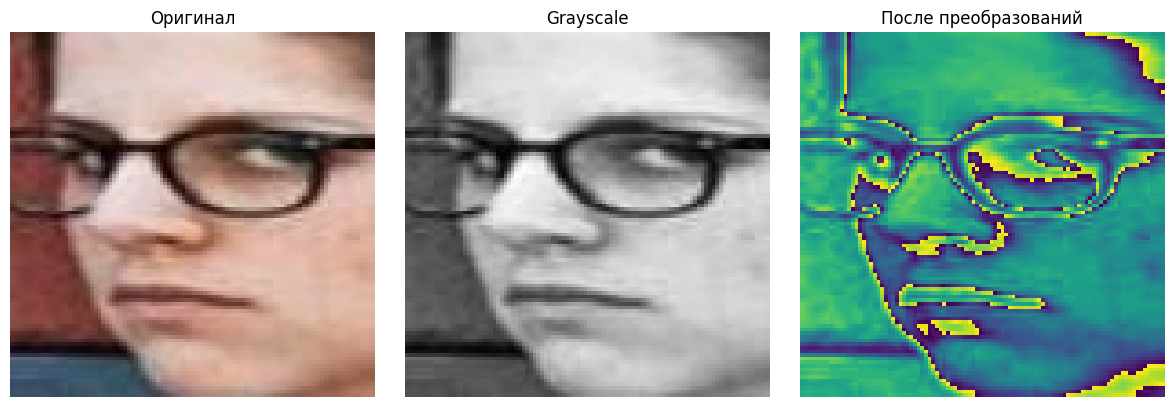

In [13]:
visualize(image_path, transform_image)

Ответы на вопросы:
1. Датасет не являетться сбалансированым. Глядя на гистограмму, больше всего представленны эмоции счастья(около 5 тыс.), меньше всего эмоций страза(около 300). Модель будет лучше понимать счастье, чем страх. Возможно будут ошибочные предсказания.
2. После всех преобразований на чертах лица появился кислотно-желтый цвет. Цвет появился на губах, глаз, на носу. Само лицо этим цветом обвелось. Черты остаються.